In [1]:
import pandas as pd
import numpy as np

import textwrap

import matplotlib
import matplotlib.pyplot as plt

In [27]:
new_metrics = pd.read_csv('pathMetrics_newController.csv')
old_metrics = pd.read_csv('pathMetrics_oldController.csv')

In [4]:
def plot_grouped_bar_graph(data, metric, new_or_old,
                           title=None,y_label=None,
                           savefig=False, filename = None):
    
    # Determine plot data and associated parameters
    label_name=['Goal Number: '+str(num) for num in data['goalNumber'].unique()]
    n_wp=len(label_name)
    
    planning_algorithms = data['PlanningAlgorithm'].unique()
        
    bar_data=[]
    for wp in label_name:
        wp_data=[]
        for algorithm in planning_algorithms:
                wp_data.append(data[(data['PlanningAlgorithm']==algorithm) & (data['goalNumber']==int(wp[-1]))][metric].to_list()[0])
        bar_data.append(np.array(wp_data))
    
    # Define x tick locations
    x = np.arange(len(planning_algorithms)) 
    # Set width of the bar plot
    width = 0.8/n_wp 

    # Plot the bar graph
    fig, ax = plt.subplots(figsize=(20,10))
    if (n_wp%2==0):
        for i in range(n_wp//2):
            ax.bar(x - (2*i+1)*width/2, bar_data[n_wp//2 - (i+1)], width, label=label_name[n_wp//2 - (i+1)])
            ax.bar(x + (2*i+1)*width/2, bar_data[n_wp//2 + i], width, label=label_name[n_wp//2 + i])
    else:
        ax.bar(x, bar_data[n_wp//2], width,label=label_name[n_wp//2])
        for i in range(n_wp//2):
            ax.bar(x - (i+1)*width, bar_data[n_wp//2 - (i+1)], width,label=label_name[n_wp//2 - (i+1)])
            ax.bar(x + (i+1)*width, bar_data[n_wp//2 + i], width,label=label_name[n_wp//2 + i])
            
    # Check if title was passed
    if title is None:
        title = metric + ' for each algorithm - '+new_or_old
    if y_label is None:
        y_label = metric

    # Add title, axis labels and tick labels
    ax.set_ylabel(y_label,fontsize=22,fontweight='bold')
    ax.set_xlabel('Algorithms',fontsize=22,fontweight='bold')
    ax.set_title(title,fontsize=24,fontweight='bold')
    ax.set_xticks(x)
    planning_algorithms=[textwrap.fill(name,20) for name in planning_algorithms]
    ax.set_xticklabels(planning_algorithms,fontsize=16)
    ax.legend(fontsize=18)

    # If savefig is True,  save the figure
    if savefig:
        if filename is None:
            filename = '../report/images/robot_'+metric + '_'+new_or_old+'.png'
        plt.savefig(filename)

    fig.tight_layout()
    plt.show()

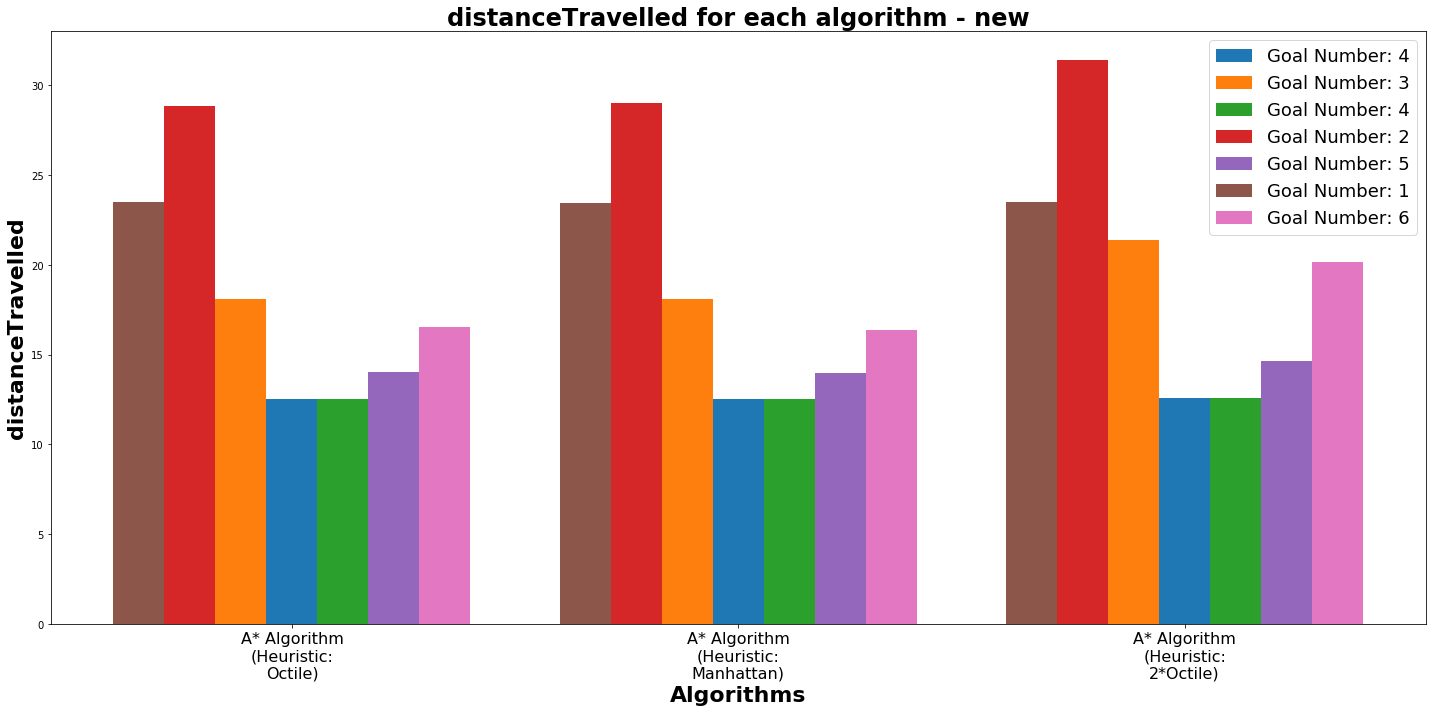

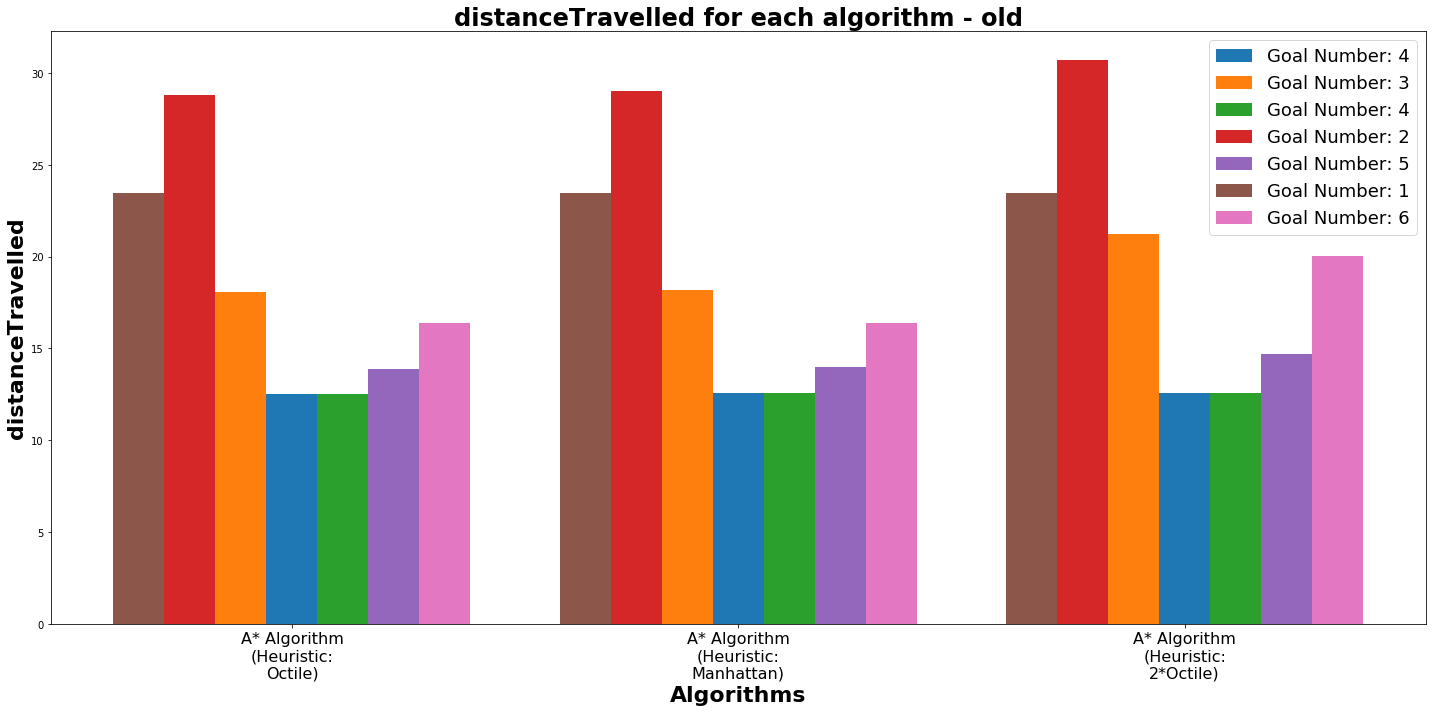

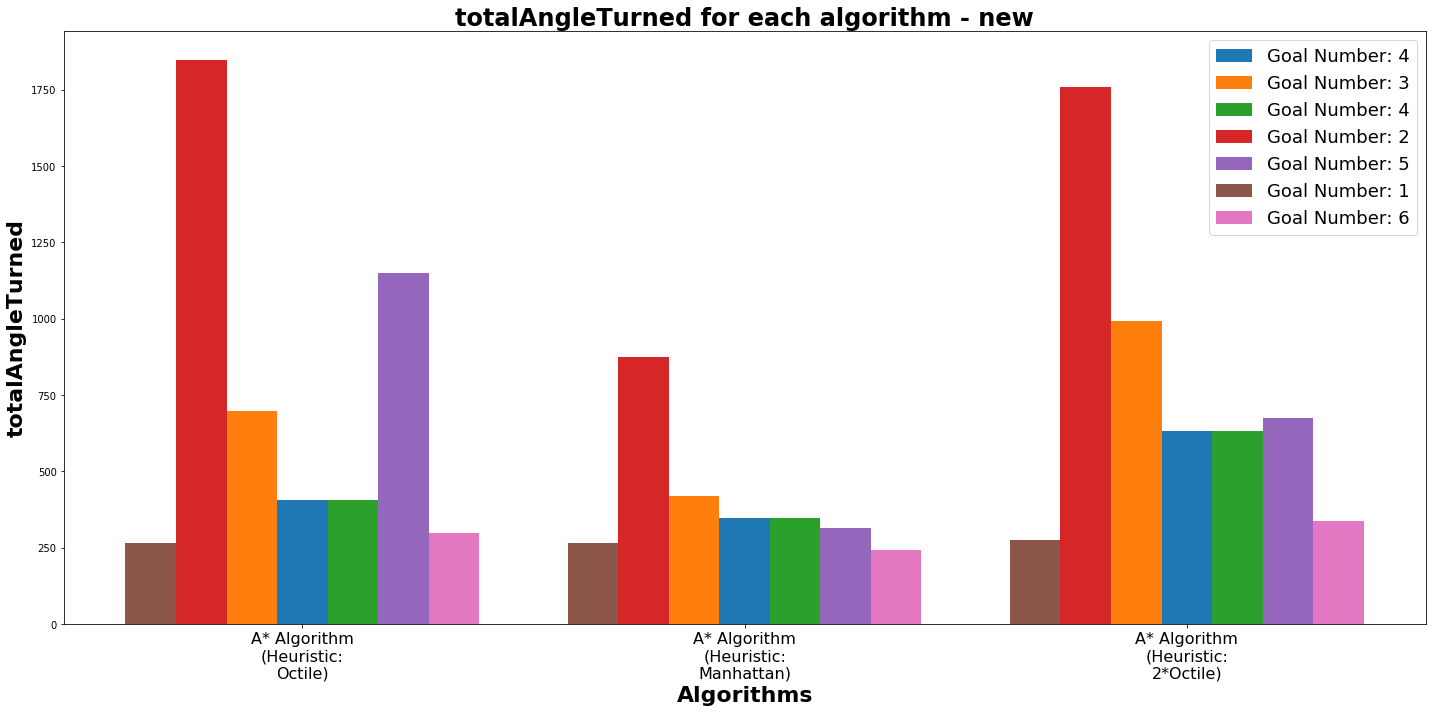

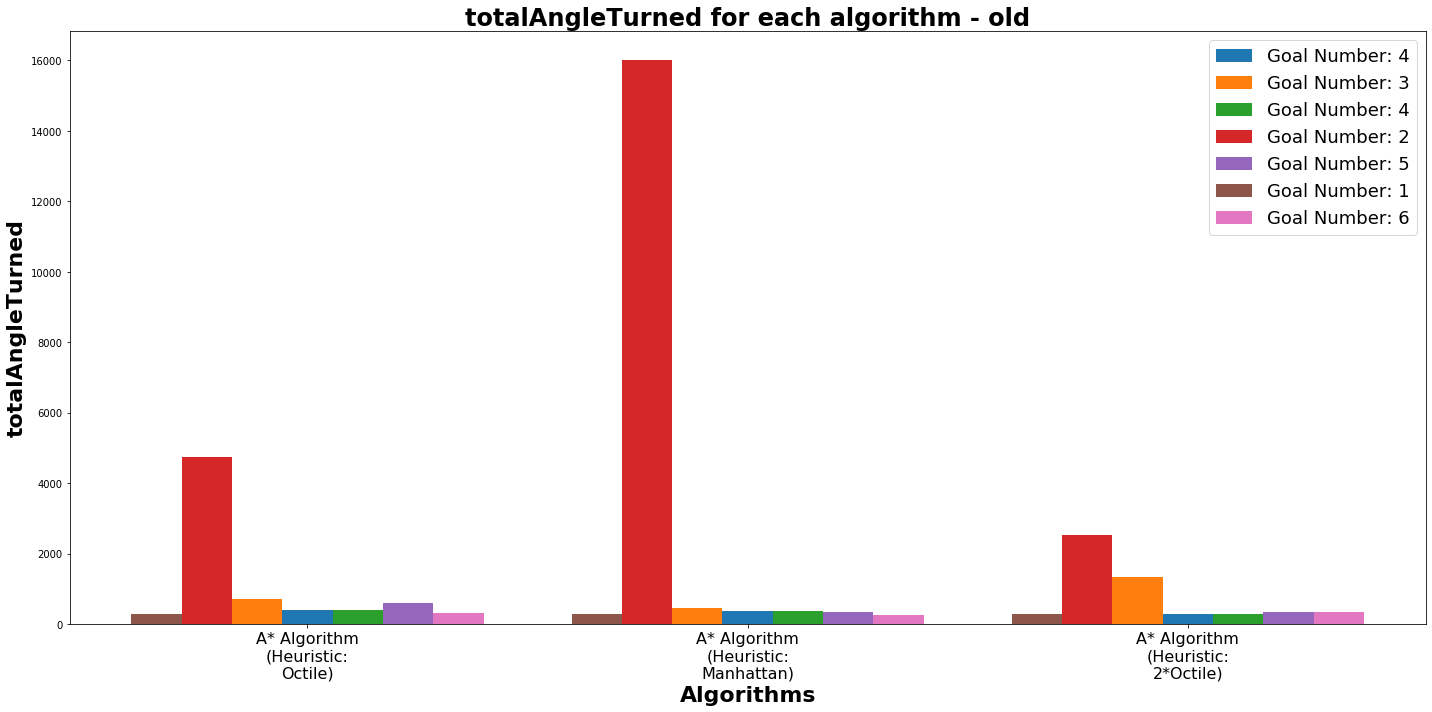

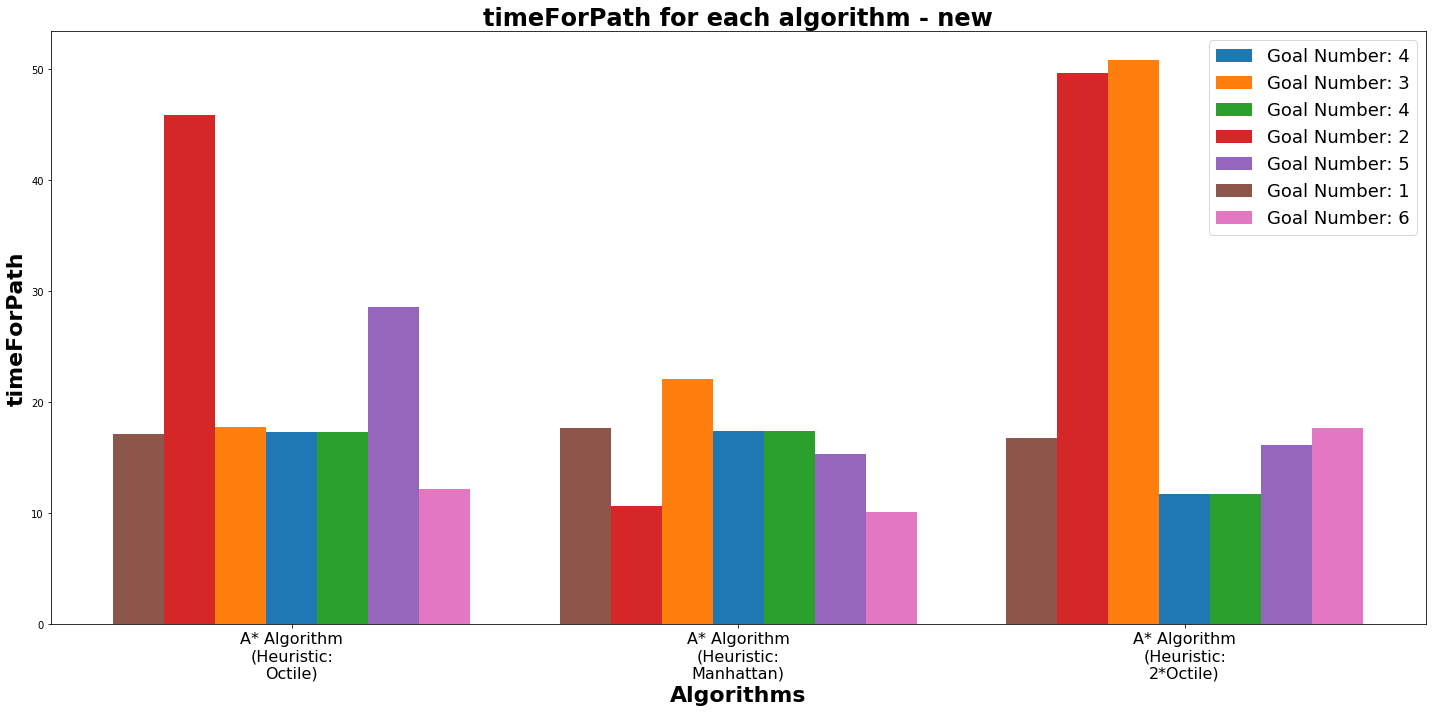

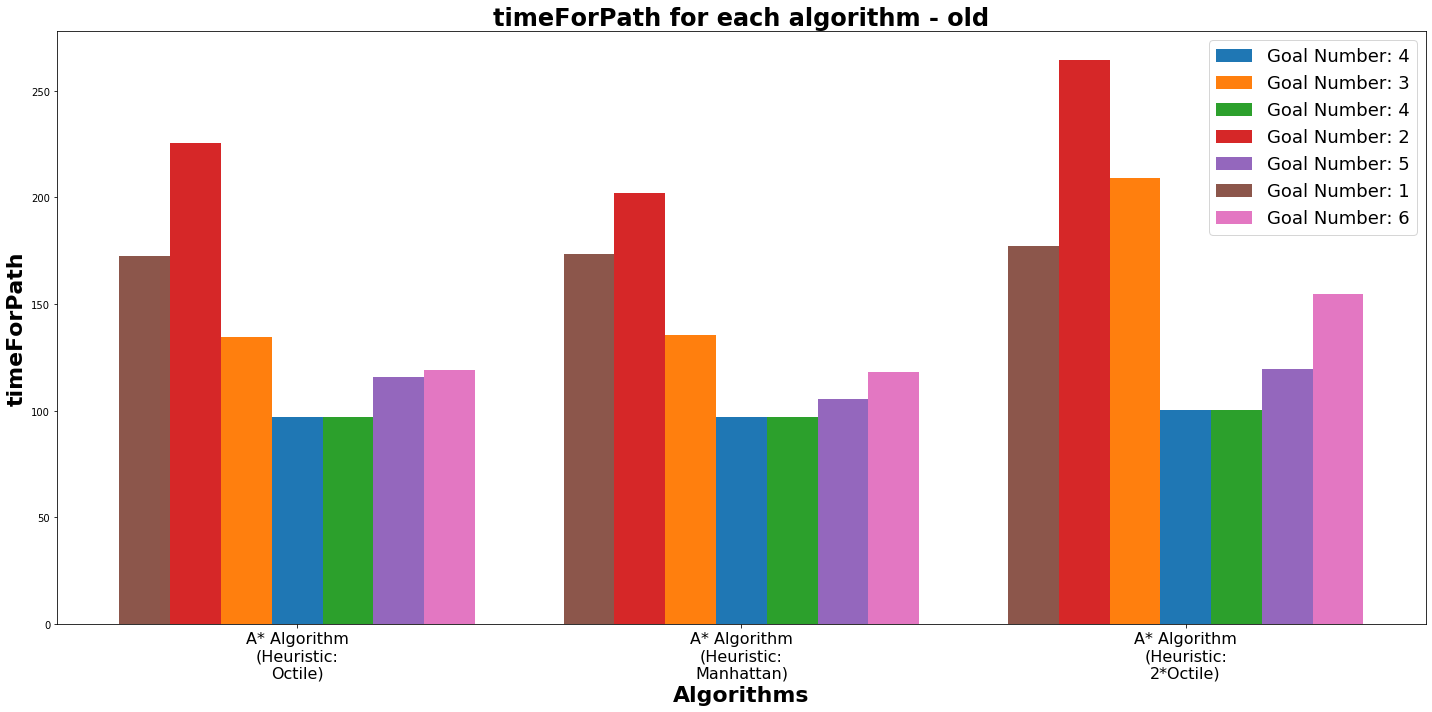

In [5]:
for metric in ['distanceTravelled','totalAngleTurned','timeForPath']:
    plot_grouped_bar_graph(new_metrics, metric,savefig=True,new_or_old='new')
    plot_grouped_bar_graph(old_metrics, metric,savefig=True,new_or_old='old')

### Comparing the old and new controller

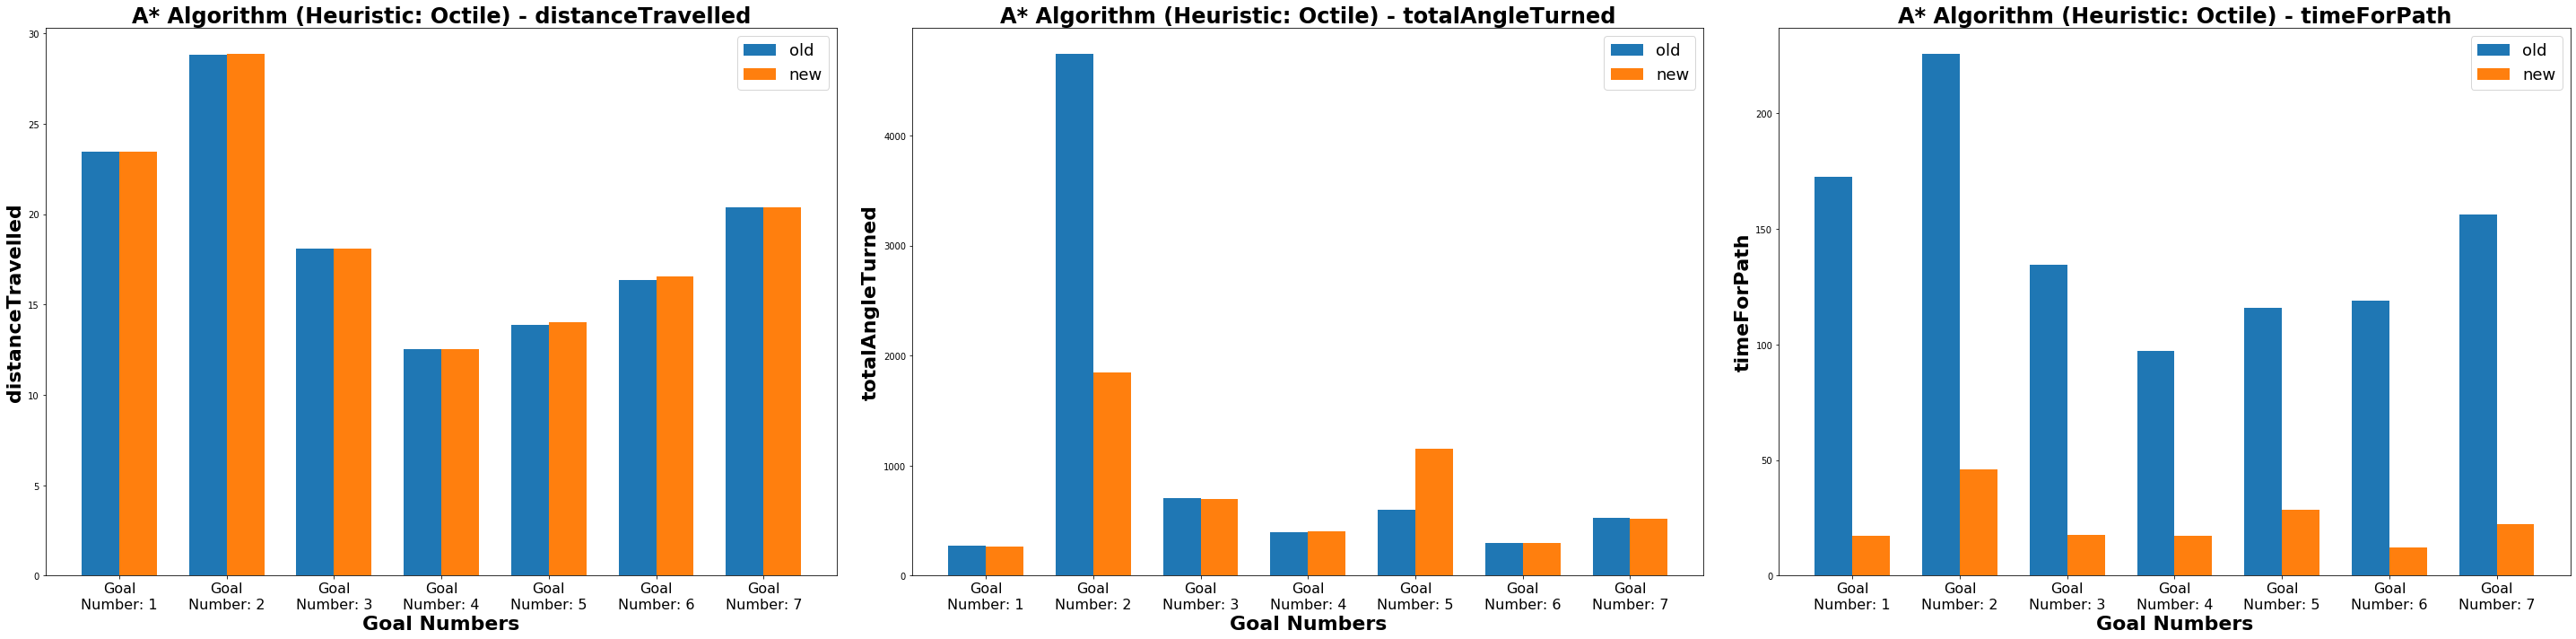

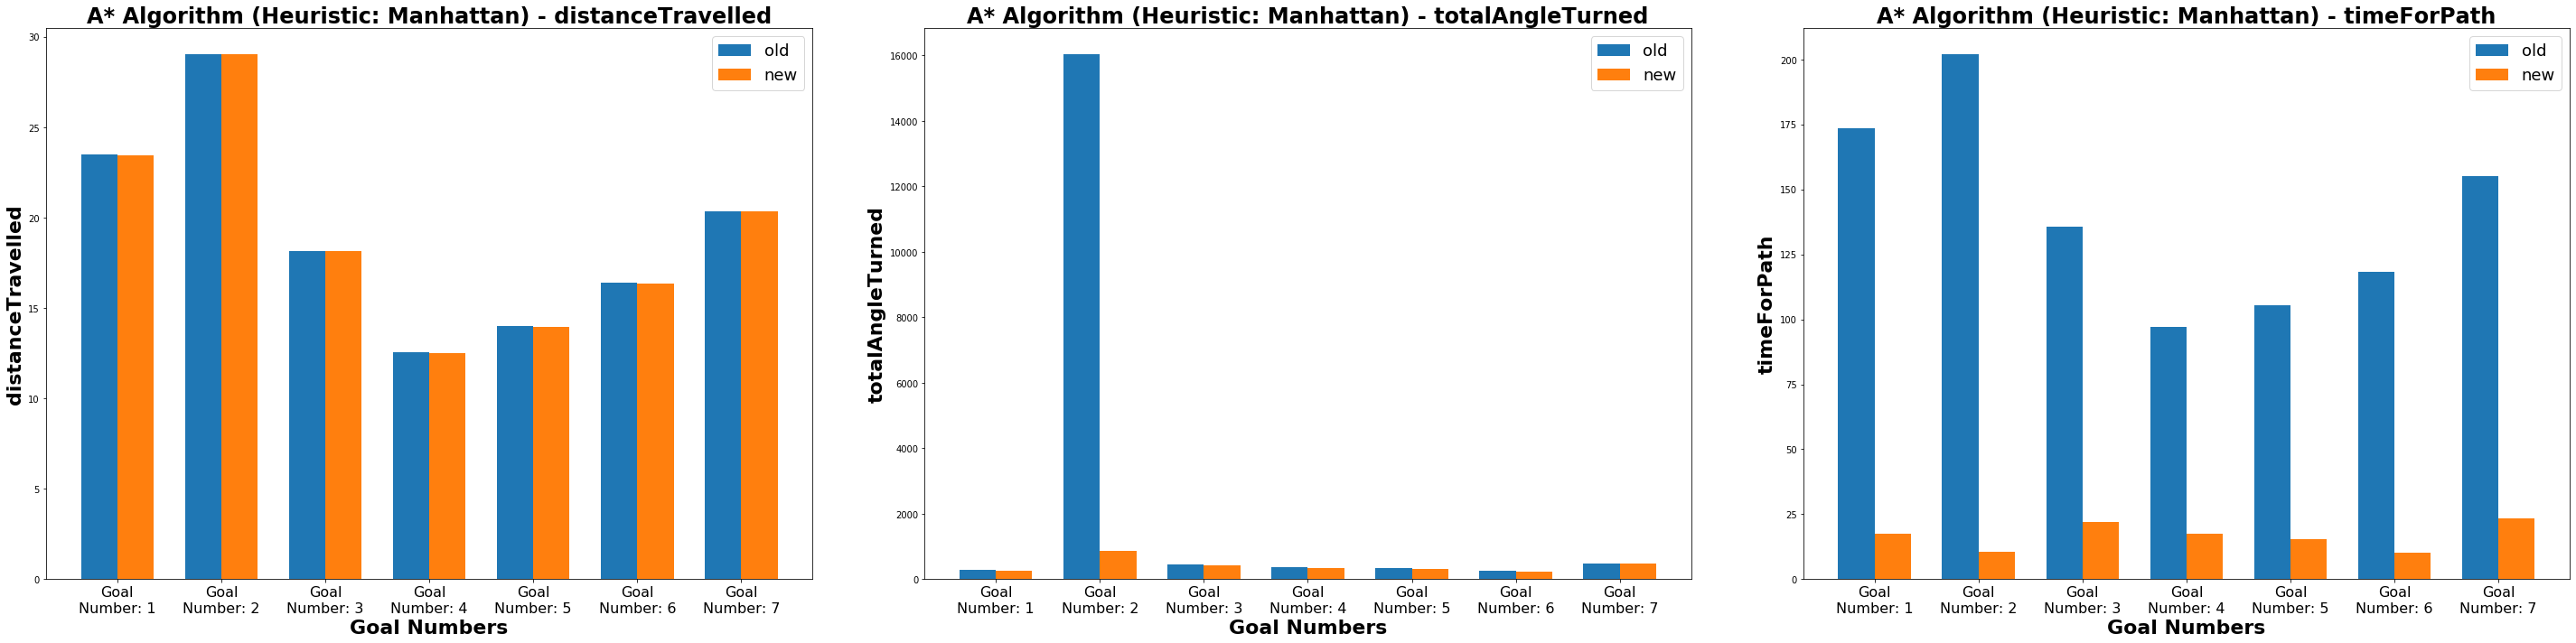

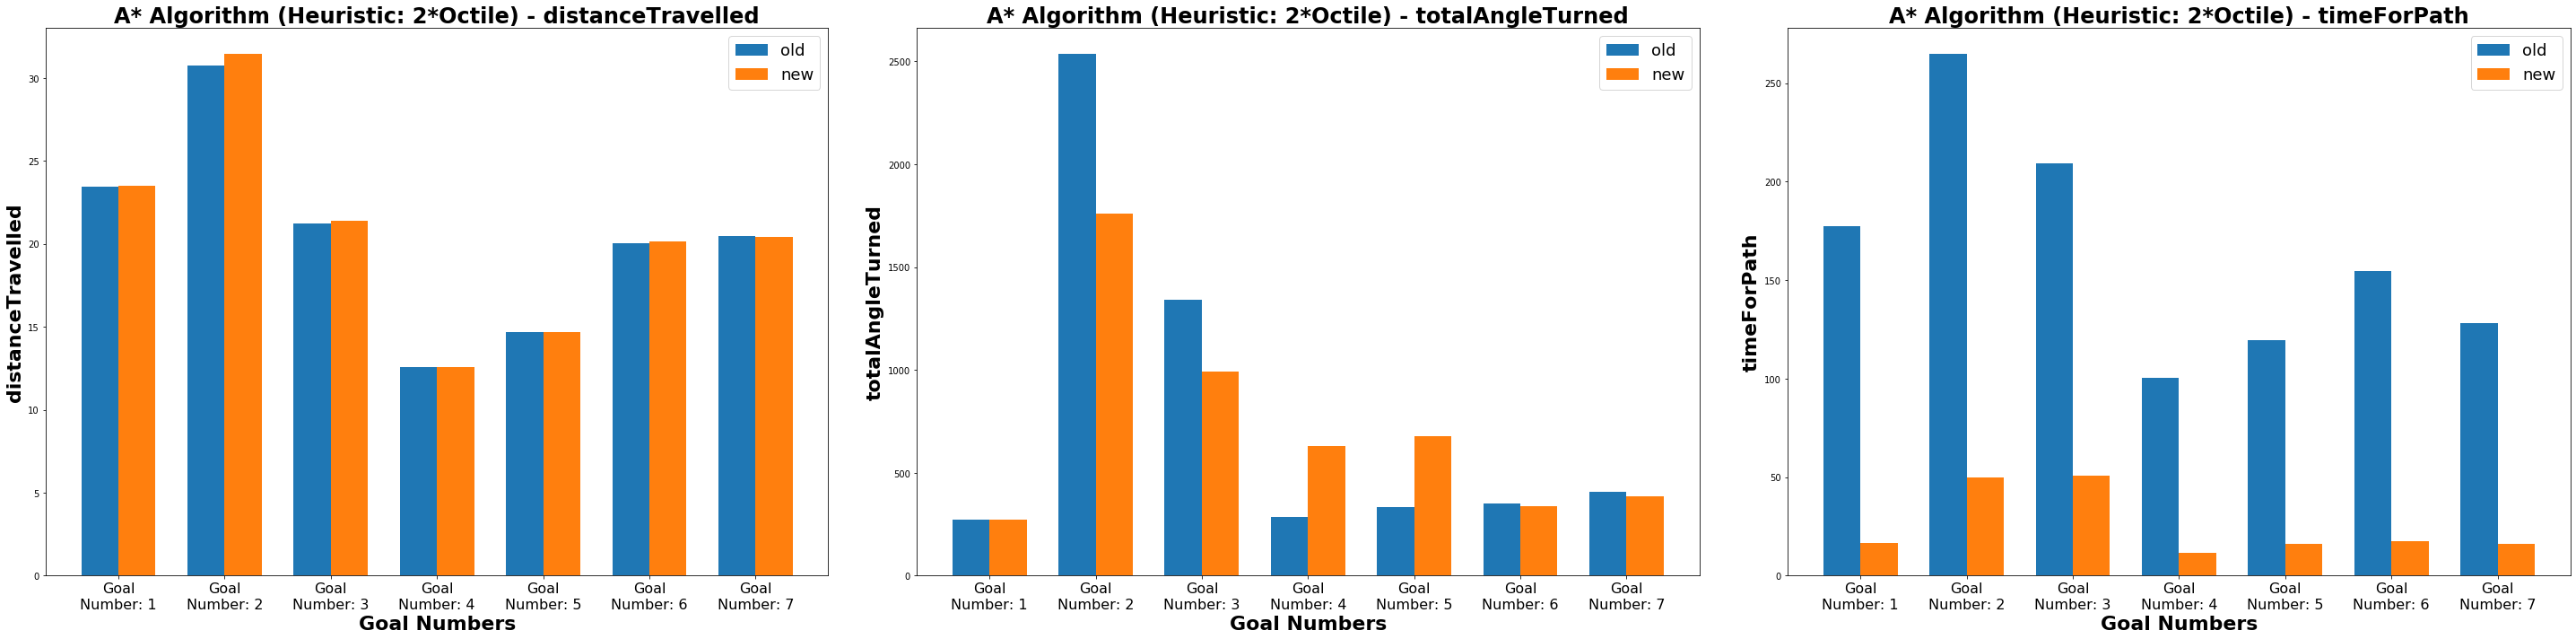

In [26]:
for algorithm in old_metrics['PlanningAlgorithm'].unique():
    fig, axes = plt.subplots(1, 3, figsize=(40,10))
    # Determine plot data and associated parameters
    label_name=['Goal Number: '+str(num) for num in old_metrics['goalNumber'].unique()]
    width = 0.7/2
    x=old_metrics['goalNumber'].unique()

    metric = ['distanceTravelled','totalAngleTurned','timeForPath']

    for i in range(3):
        axes[i].bar(x-width/2,old_metrics[old_metrics['PlanningAlgorithm']==algorithm][metric[i]],width,label='old')
        axes[i].bar(x+width/2,new_metrics[new_metrics['PlanningAlgorithm']==algorithm][metric[i]],width,label='new')

        # Add title, axis labels and tick labels
        axes[i].set_ylabel(metric[i],fontsize=22,fontweight='bold')
        axes[i].set_xlabel('Goal Numbers',fontsize=22,fontweight='bold')
        axes[i].set_title(algorithm+' - '+metric[i],fontsize=24,fontweight='bold')
        axes[i].set_xticks(x)
        label_name=[textwrap.fill(name,10) for name in label_name]
        axes[i].set_xticklabels(label_name,fontsize=16)
        axes[i].legend(fontsize=18)
    alg_name = ''.join(c for c in '_'.join(algorithm.split()) if c.isalnum() or c=='_')   
    filename = '../report/images/compare_robot_'+alg_name +'.png'
    plt.savefig(filename)
    fig.tight_layout()
    plt.show()
